<a href="https://colab.research.google.com/github/DasSagor/CodeAlpha_CreditScoringModel/blob/main/CreditScoringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================
# Credit Scoring Model Project (Your Credit_Card.csv Dataset)
# =============================
# Google Colab Ready & Error-Free


# -----------------------------
# Step 1: Install dependencies
# -----------------------------
!pip install -q shap lightgbm optuna

In [ ]:
# -----------------------------
# Step 2: Import libraries
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import shap

In [ ]:
# -----------------------------
# Step 3: Load dataset (uploaded file)
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset inside Google Drive
file_path = "/content/drive/MyDrive/Credit Scoring Model/Credit_Card.csv"

# Load dataset
import pandas as pd
data = pd.read_csv(file_path)

print("Dataset shape:", data.shape)
print(data.head())

Mounted at /content/drive
Dataset shape: (30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  

In [ ]:
# -----------------------------
# Step 4: Preprocessing
# -----------------------------
# Identify target column (update if your dataset uses different column name)
# For example, many credit datasets use 'default.payment.next.month' or 'target'
target_col = 'default.payment.next.month' if 'default.payment.next.month' in data.columns else 'target'

if target_col not in data.columns:
    raise ValueError("Please update 'target_col' to match the name of your target column in Credit_Card.csv")


In [ ]:
# Fill missing values with median
data.fillna(data.median(), inplace=True)

# Features and target
X = data.drop(target_col, axis=1)
y = data[target_col]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y, random_state=42
)


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# -----------------------------
# Step 5: Train Models
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }




[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3527
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# -----------------------------
# Step 6: Compare Results
# -----------------------------
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n")
print(results_df)


Model Performance:

                     Accuracy  Precision    Recall        F1   ROC-AUC
Logistic Regression  0.808000   0.688172  0.241145  0.357143  0.707777
Decision Tree        0.726833   0.389362  0.413715  0.401169  0.614733
Random Forest        0.814500   0.641161  0.366240  0.466187  0.760868
LightGBM             0.817333   0.660194  0.358704  0.464844  0.777244


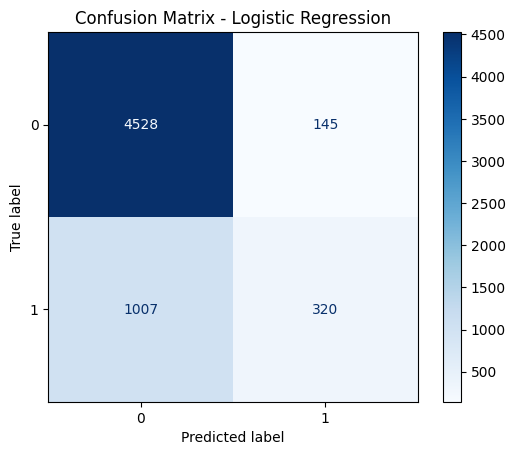

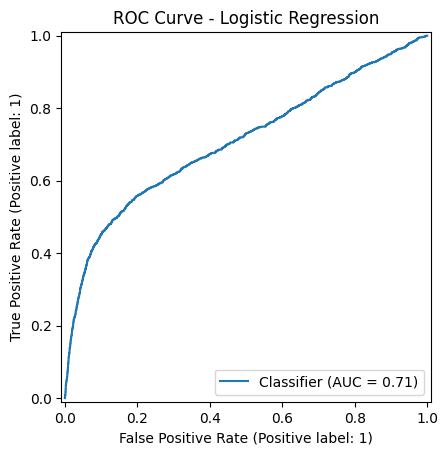

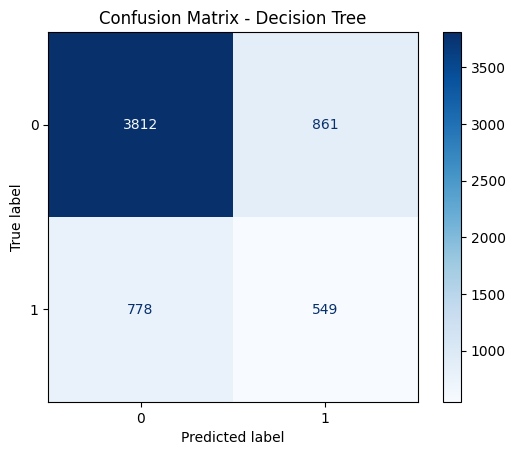

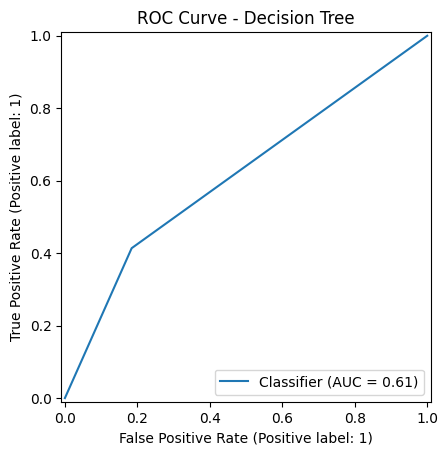

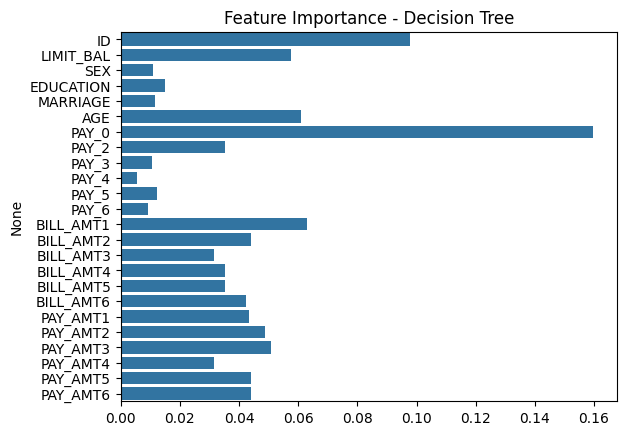

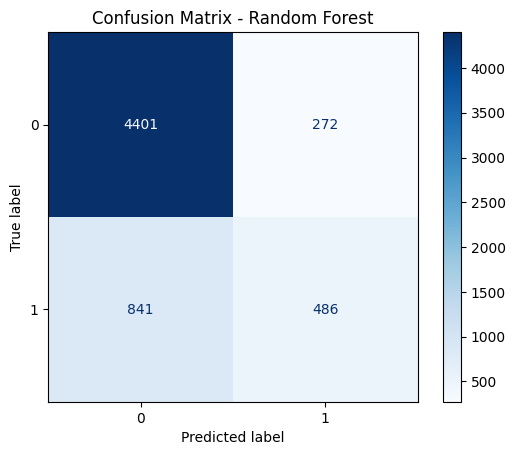

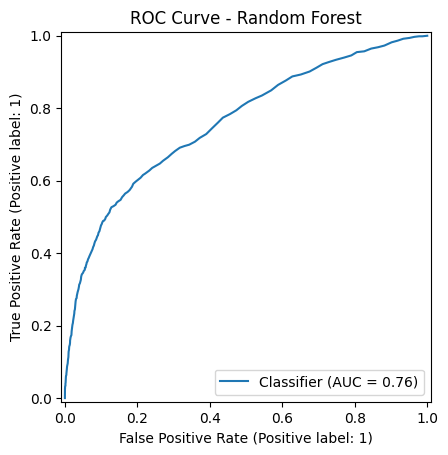

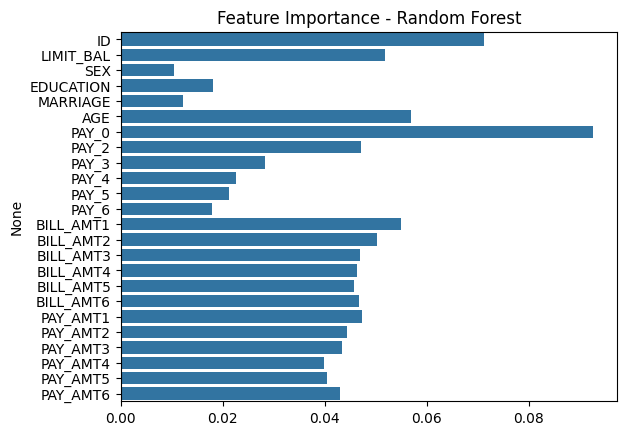

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


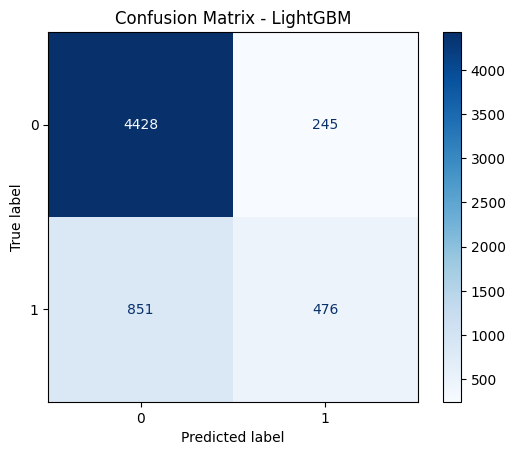

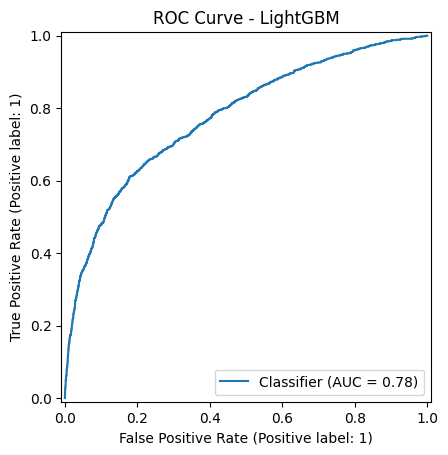

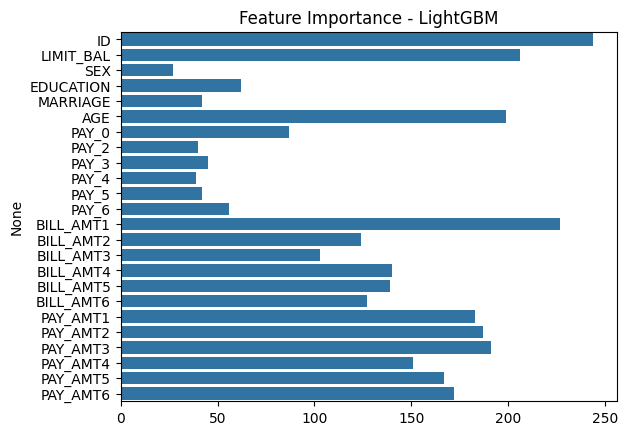

In [ ]:
# -----------------------------
# Step 7: Confusion Matrix + ROC (All Models)
# -----------------------------
for name, model in models.items():
  y_pred = model.predict(X_test_scaled)
  y_proba = model.predict_proba(X_test_scaled)[:,1]


  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm).plot(cmap="Blues")
  plt.title(f"Confusion Matrix - {name}")
  plt.show()


  RocCurveDisplay.from_predictions(y_test, y_proba)
  plt.title(f"ROC Curve - {name}")
  plt.show()


  if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    sns.barplot(x=importances, y=X.columns)
    plt.title(f"Feature Importance - {name}")
    plt.show()

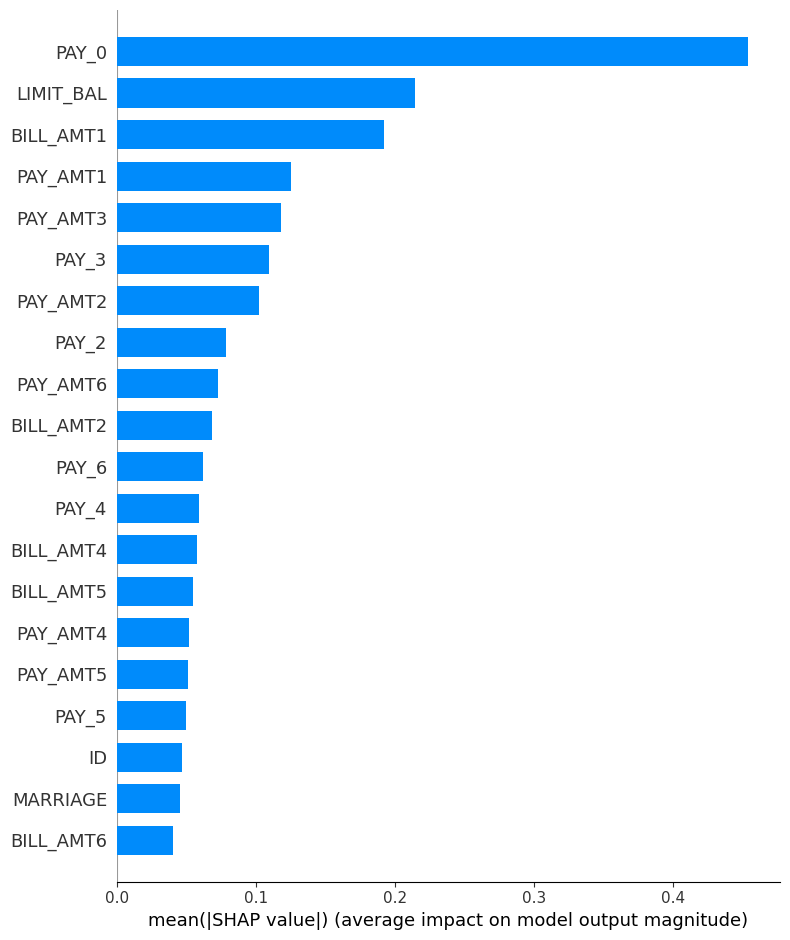

In [ ]:
# -----------------------------
# Step 8: SHAP Explainability (Best Model)
# -----------------------------
best_model_name = results_df["ROC-AUC"].idxmax()
best_model = models[best_model_name]


explainer = shap.Explainer(best_model, X_train_scaled)
shap_values = explainer(X_test_scaled[:200])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# -----------------------------
# Step 9: Hyperparameter Tuning for All Models
# -----------------------------
param_grids = {
"Logistic Regression": {
'C': [0.01, 0.1, 1, 10],
'penalty': ['l2'],
'solver': ['lbfgs']
},
"Decision Tree": {
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10]
},
"Random Forest": {
'n_estimators': [100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5]
},
"LightGBM": {
'n_estimators': [100, 200],
'max_depth': [-1, 10, 20],
'learning_rate': [0.01, 0.05, 0.1]
}
}


for name, param_grid in param_grids.items():
  print(f"\nTuning {name}...")
  grid = GridSearchCV(models[name], param_grid,
  scoring='roc_auc', cv=3, n_jobs=-1)
  grid.fit(X_train_scaled, y_train)
  print(f"Best Params ({name}):", grid.best_params_)
  print(f"Best ROC-AUC ({name}):", grid.best_score_)


Tuning Logistic Regression...
Best Params (Logistic Regression): {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC-AUC (Logistic Regression): 0.7265119232234111

Tuning Decision Tree...
Best Params (Decision Tree): {'max_depth': 10, 'min_samples_split': 10}
Best ROC-AUC (Decision Tree): 0.7150960783930181

Tuning Random Forest...
Best Params (Random Forest): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC (Random Forest): 0.7803467354854217

Tuning LightGBM...
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3527
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.25863